In [28]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.linear_model import LogisticRegression, SGDClassifier
# from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

In [7]:
df_train = pd.read_csv("./data/CNDtrain.csv") 

In [8]:
df_test = pd.read_csv("./data/CNDtest.csv") 

# df_test = pd.read_csv("./data/CND2023.csv") 

In [9]:
df_2023 = pd.read_csv("./data/CND2023.csv") 

# df_test = pd.read_csv("./data/CND2023.csv") 

In [10]:
df = pd.concat([df_train, df_test, df_2023])

In [11]:
import numpy as np
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt


In [8]:
trancatedSVD = TruncatedSVD(n_components=2, random_state=42)


In [9]:
df.groupby(['CND'])['CND'].count()

CND
0    213
1    194
Name: CND, dtype: int64

In [10]:
df_test.groupby(['CND'])['CND'].count()

CND
0    17
1    31
Name: CND, dtype: int64

In [12]:
vectorizer_dir = f'./model/tfidf_all.joblib'
from joblib import dump, load
vectorizer = load(vectorizer_dir)

In [13]:
len(vectorizer.get_feature_names_out())

694

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df["MessageID"], df["CND"], test_size=0.2, random_state=42)

In [21]:
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [108]:
# https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html#building-a-pipeline

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

2023-10-23 14:36:06.569194: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-23 14:36:06.617362: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-23 14:36:06.618721: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-23 14:36:07.595106: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [18]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


2023-10-23 14:36:17.871487: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [19]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

# Check if a GPU is available
if len(tf.config.experimental.list_physical_devices('GPU')) > 0:
    print("GPU is available and will be used.")
else:
    print("GPU is not available. You may want to check your GPU setup.")

GPU is not available. You may want to check your GPU setup.


In [72]:
model = Sequential()
# model.add(Dense(256, input_dim=X_train_vec.shape[1], activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(128, input_dim=X_train_vec.shape[1], activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(64, activation='relu'))
model.add(Dense(64, input_dim=X_train_vec.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification with a sigmoid activation

# model.add(Dense(units=1024, input_dim=X_train_vec.shape[1], kernel_initializer ='uniform', activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(units=512, kernel_initializer ='uniform', activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(units=1, kernel_initializer ='uniform', activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.compile(loss='msle', optimizer=RMSprop(lr = 0.0001), metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# Train the model and store the training history


In [73]:
history = model.fit(
    X_train_vec.toarray(), y_train, epochs=100, batch_size=32, 
    validation_data=(X_test_vec.toarray(), y_test),
    callbacks=[early_stopping]  # Add the early stopping callback here
)


Epoch 1/100
13/13 [==============================] - 1s 13ms/step - loss: 0.6932 - accuracy: 0.4753 - val_loss: 0.6906 - val_accuracy: 0.5567
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6885 - accuracy: 0.5403 - val_loss: 0.6898 - val_accuracy: 0.5464
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6843 - accuracy: 0.6519 - val_loss: 0.6872 - val_accuracy: 0.5464
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6795 - accuracy: 0.7039 - val_loss: 0.6860 - val_accuracy: 0.6289
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6710 - accuracy: 0.7403 - val_loss: 0.6813 - val_accuracy: 0.6495
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6569 - accuracy: 0.7636 - val_loss: 0.6712 - val_accuracy: 0.6495
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6313 - accuracy: 0.7870 - val_loss: 0.6656 - val_accuracy: 0.5464
Epoch 8/100


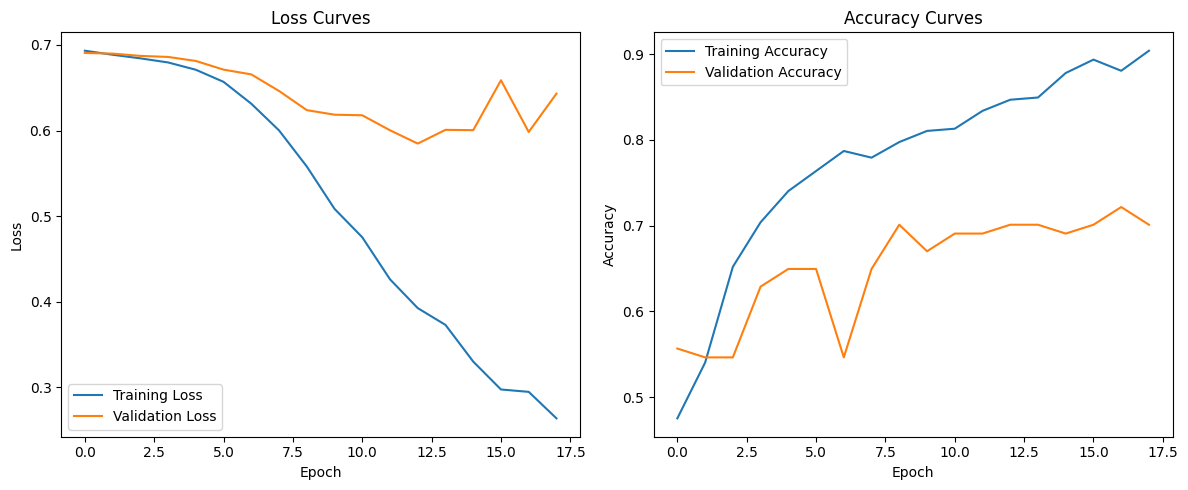

In [76]:
# Plot the loss and accuracy curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.savefig("./charts/learning curve.png")
plt.show()

In [91]:
model_path = "./model/CNDclassifierDense64.h5"

In [92]:
model.save(model_path)

In [95]:
from keras.models import load_model
loaded_model = load_model(model_path)

In [96]:
X_train_pred_keras = loaded_model.predict(X_train_vec.toarray())
accuracy_score(y_train, (X_train_pred_keras[:,0] >= 0.5).astype(int))

13/13 [==============================] - 0s 2ms/step


0.8779220779220779

In [97]:

f1_score(y_train, (X_train_pred_keras[:,0] >= 0.5).astype(int))

0.877922077922078

In [98]:
X_test_pred_keras = loaded_model.predict(X_test_vec.toarray())


4/4 [==============================] - 0s 2ms/step


In [99]:
(X_test_pred_keras[:,0] > 0.5).astype(int)

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1])

In [100]:
accuracy_score(y_test, (X_test_pred_keras[:,0] >= 0.5).astype(int))

0.7010309278350515

In [101]:
from sklearn.metrics import f1_score
f1_score(y_test, (X_test_pred_keras[:,0] >= 0.5).astype(int))

0.7238095238095238

In [102]:
from sklearn.metrics import classification_report
print(classification_report(y_test, (X_test_pred_keras[:,0] >= 0.5).astype(int)))

              precision    recall  f1-score   support

           0       0.67      0.68      0.67        44
           1       0.73      0.72      0.72        53

    accuracy                           0.70        97
   macro avg       0.70      0.70      0.70        97
weighted avg       0.70      0.70      0.70        97



Text(0.5, 1.0, 'Keras Dense 64 Train')

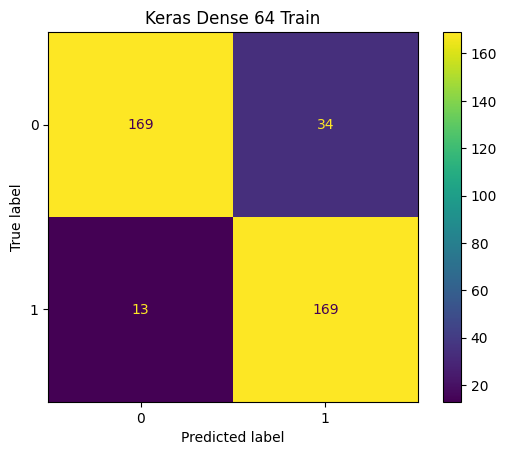

In [87]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(y_train, (X_train_pred_keras[:,0] >= 0.5).astype(int))

cm_display = ConfusionMatrixDisplay(cm).plot()
plt_title = "Keras Dense 64 Train"
plt.title(plt_title)

Text(0.5, 1.0, 'Keras Dense 64 Validate')

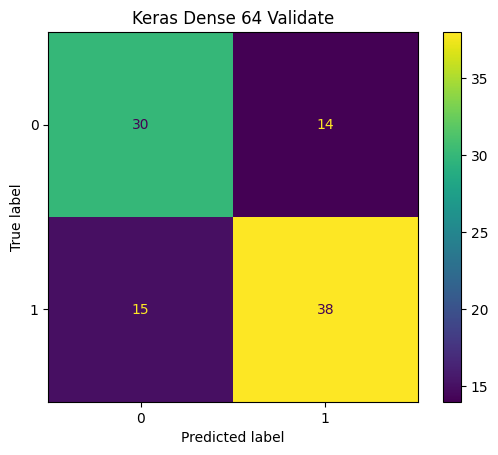

In [89]:
cm = confusion_matrix(y_test, (X_test_pred_keras[:,0] >= 0.5).astype(int))

cm_display = ConfusionMatrixDisplay(cm).plot()
plt_title = "Keras Dense 64 Validate"
plt.title(plt_title)
# plt.savefig(f"./charts/{plt_title}_Confusion_Matrix.png")